In [2]:
# In this data set we are going to predict whether the patient has diabities or not. WE WILL USE LOGISTICS REGRESSION ALGORITHM. lets start our project

In [6]:
pip install pyforest   #first we have to install pyforest module

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#first'


In [8]:
from pyforest import*
lazy_imports()

['from sklearn.decomposition import PCA',
 'import altair as alt',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.model_selection import train_test_split',
 'import statsmodels.api as sm',
 'import seaborn as sns',
 'import re',
 'import statistics',
 'from sklearn.preprocessing import RobustScaler',
 'import skimage',
 'from openpyxl import load_workbook',
 'import cv2',
 'import tensorflow as tf',
 'from sklearn.linear_model import ElasticNetCV',
 'from scipy import signal as sg',
 'import pickle',
 'import fastai',
 'import os',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.preprocessing import OneHotEncoder',
 'import pydot',
 'from sklearn.manifold import TSNE',
 'import spacy',
 'import imutils',
 'from sklearn.linear_model import LinearRegression',
 'import sys',
 'from sklearn.cluster import KMeans',
 'import plotly as py',
 'from sklearn.linear_model import RidgeCV',
 'im

In [9]:
data=pd.read_csv('pima-indians-diabetes-2.csv')

<IPython.core.display.Javascript object>

In [4]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.shape #check number of rows and columns

(768, 9)

In [18]:
data.isnull().values.any() #check any null values

False

In [16]:
data.dtypes #check the data types of all the features 

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

array([[<Axes: title={'center': 'Preg'}>,
        <Axes: title={'center': 'Plas'}>,
        <Axes: title={'center': 'Pres'}>,
        <Axes: title={'center': 'skin'}>],
       [<Axes: title={'center': 'test'}>,
        <Axes: title={'center': 'mass'}>,
        <Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

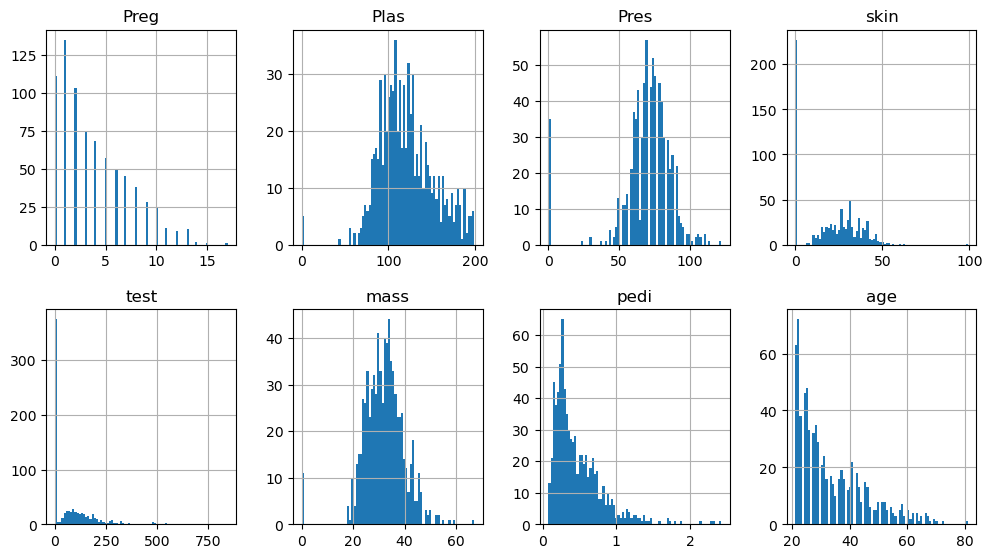

In [10]:
col=list(data)[0:-1]
data[col].hist(bins=80,figsize=(12,50),layout=(14,4))

In [11]:
data.corr() #checkinh the correlation

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Correlation of different attributes')

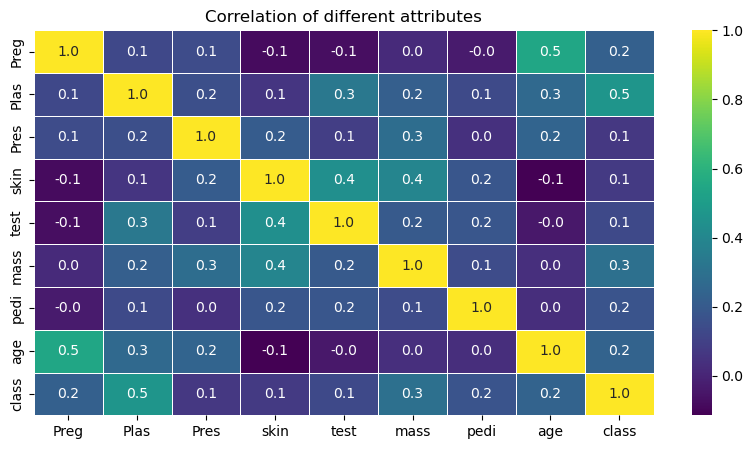

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
plt.title('Correlation of different attributes')

<IPython.core.display.Javascript object>

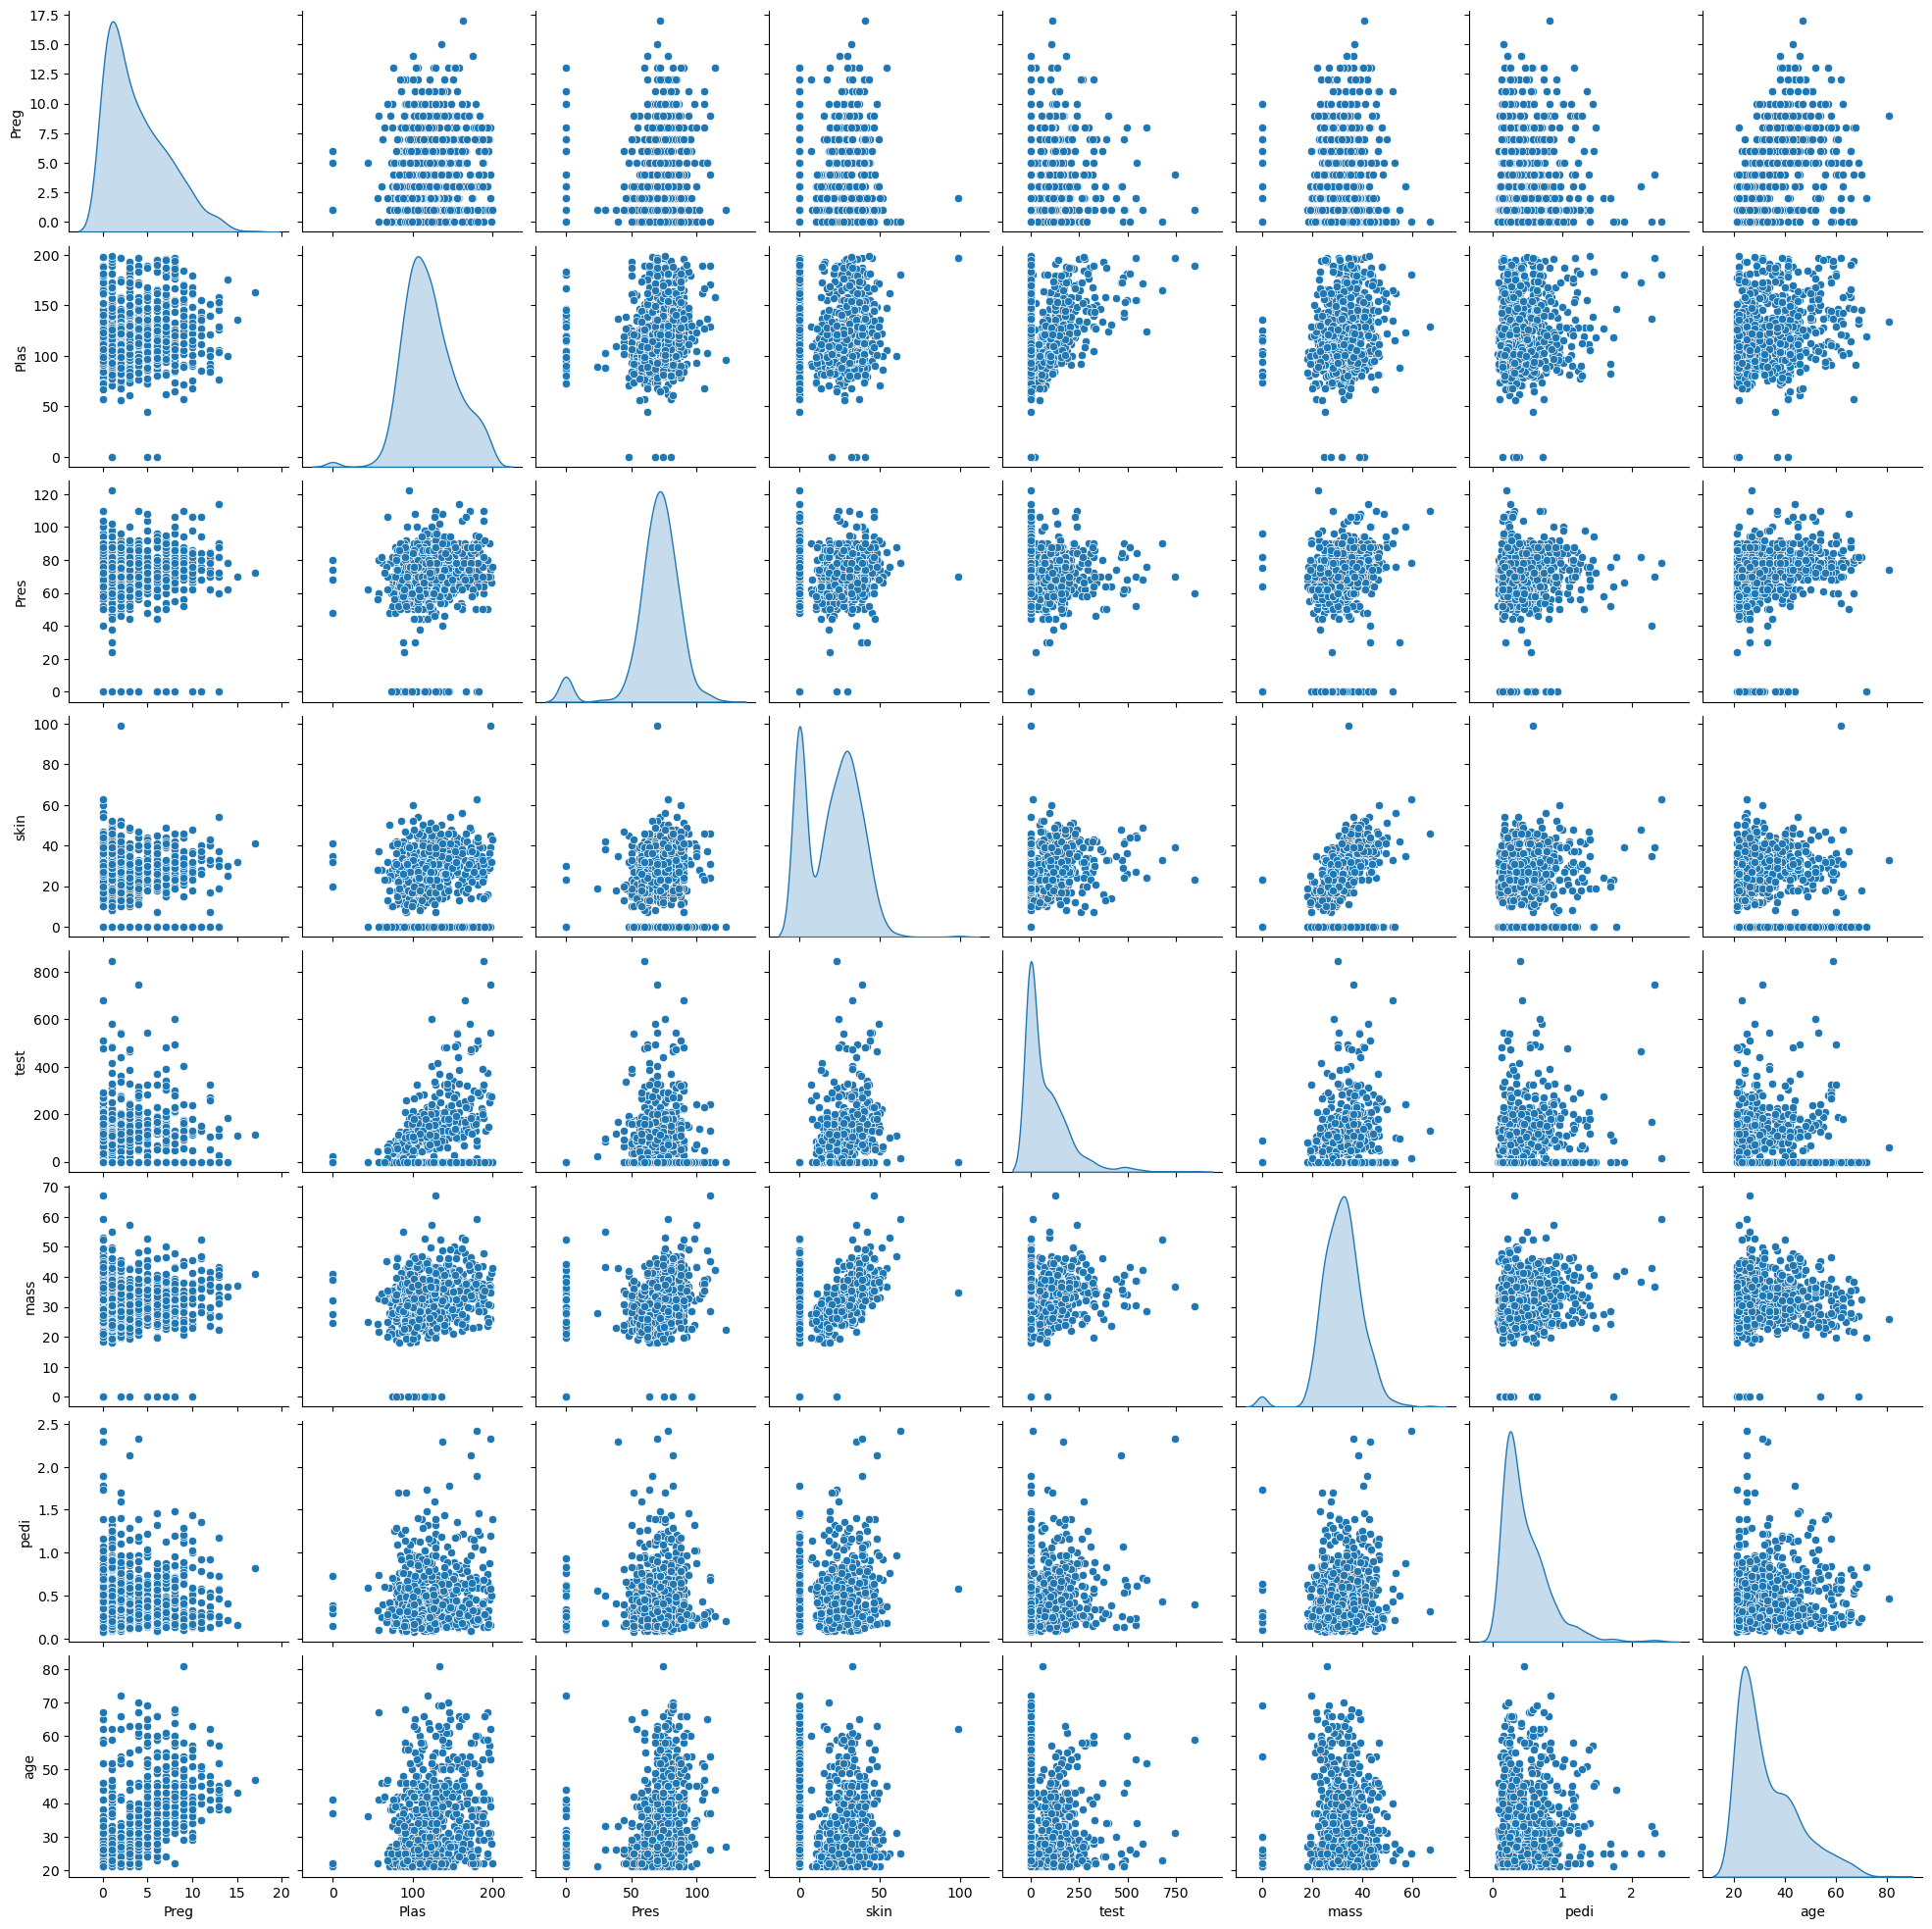

In [13]:
 data_new=data.iloc[:,0:-1]
sns.pairplot(data_new,diag_kind='kde') #checking the correlation graphically

In [14]:
data['class'].value_counts()  #target column is checked, if we have more 1s and more 0s then our model will be checking or predicting from more 1s or 0s

0    500
1    268
Name: class, dtype: int64

In [38]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
from sklearn.model_selection import train_test_split
x=data.drop('class',axis=1)
y=data['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.30) 
# we have splitted our data 

In [17]:
# x_train
x_test

,Preg,Plas,Pres,skin,test,mass,pedi,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
241,4,91,70,32,88,33.1,0.446,22
599,1,109,38,18,120,23.1,0.407,26
650,1,91,54,25,100,25.2,0.234,23
11,10,168,74,0,0,38.0,0.537,34


In [18]:
y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: class, Length: 537, dtype: int64

In [19]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: class, Length: 231, dtype: int64

In [20]:
print('{}% in training set'.format((len(x_train)/len(data))*100))
print('{}% in testing set'.format((len(x_test)/len(data))*100) ) #checking % of training and test data

69.921875% in training set
30.078125% in testing set


In [21]:
# NOW WE WILL PREPARE OUR DATA FOR CHECKING THE MISSING VALUES

In [22]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [23]:
data.mean()

Preg       3.845052
Plas     120.894531
Pres      69.105469
skin      20.536458
test      79.799479
mass      31.992578
pedi       0.471876
age       33.240885
class      0.348958
dtype: float64

In [24]:
#fill all the missing values with zero 
from sklearn.impute import SimpleImputer
replace=SimpleImputer(missing_values=0, strategy='mean')
cols=x_train.columns
x_train=pd.DataFrame(replace.fit_transform(x_train))
x_test=pd.DataFrame(replace.fit_transform(x_test))
x_train.columns=cols
x_test.columns=cols

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
x_train

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.000000,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.000000,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.000000,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.000000,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.000000,158.243346,35.2,0.197,29.0
...,...,...,...,...,...,...,...,...
532,2.000000,157.0,74.0,35.000000,440.000000,39.4,0.134,30.0
533,7.000000,187.0,50.0,33.000000,392.000000,33.9,0.826,34.0
534,13.000000,126.0,90.0,28.672131,158.243346,43.4,0.583,42.0
535,4.000000,171.0,72.0,28.672131,158.243346,43.6,0.479,26.0


In [26]:
# NOW WE ARE PROPERLY STARTING LOGISTICS REGRESSION ALOGORITH

In [27]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [28]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [143]:
len(x_test)

231

In [30]:
y_pred=model.predict(x_test)


In [31]:
len(y_pred)

231

In [32]:
model.score(x_test,y_test)

0.7792207792207793

In [33]:
model.score(x_train,y_train)

0.7672253258845437

In [34]:
len(x_test)

231

In [35]:
len(y_pred)

231

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

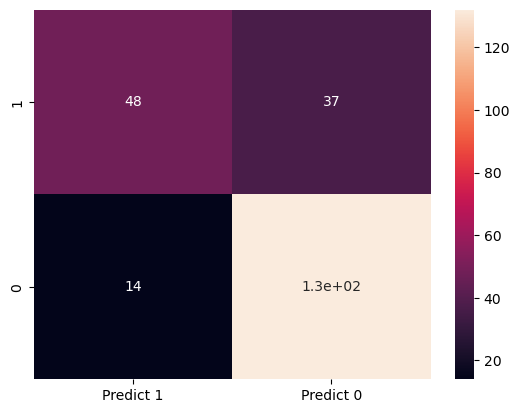

In [40]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
data_cm=pd.DataFrame(cm,index=[i for i in['1','0']],
                     columns=[i for i in['Predict 1','Predict 0']])
sns.heatmap(data_cm,annot=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

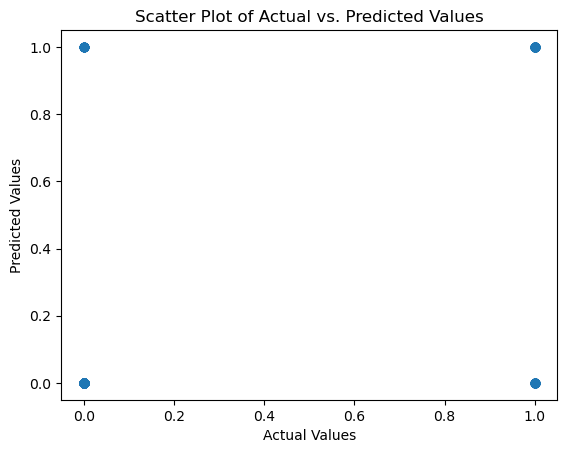

In [155]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()
